<a href="https://colab.research.google.com/github/minhtrong20130448/ML/blob/main/Lab_7_20130448_NguyenMinhTrong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [35]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import mode

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [23]:

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

svc_linear = SVC(kernel='linear', random_state=0)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(svc_linear, X_train, Y_train, scoring=scoring, cv=10)

print(sorted(scores.keys()))
print(np.mean(scores['fit_time']))
print(np.mean(scores['score_time']))
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_precision_macro']))
print(np.mean(scores['test_recall_macro']))
print(np.mean(scores['test_f1_macro']))

['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
0.008866691589355468
0.017290425300598145
0.9800000000000001
0.9866666666666667
0.9777777777777779
0.979259259259259


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [24]:
X,y = datasets.load_iris(return_X_y=True);

X_new = SelectKBest(chi2, k=2).fit_transform(X,y);

X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(rf, X_train, Y_train, scoring=scoring, cv=10)

print(sorted(scores.keys()))
print(np.mean(scores['fit_time']))
print(np.mean(scores['score_time']))
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_precision_macro']))
print(np.mean(scores['test_recall_macro']))
print(np.mean(scores['test_f1_macro']))

['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
0.5672954082489013
0.0567816972732544
0.9445454545454547
0.9544444444444442
0.9472222222222222
0.9447883597883597


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [45]:
dataset_mnist = datasets.load_digits()
# X = dataset_mnist.data
X = StandardScaler().fit_transform(dataset_mnist.data)
Y = dataset_mnist.target
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)
accuracy_kmeans =  round(metrics.accuracy_score(Y, clusters),4)
centroids = kmeans.cluster_centers_

#Gán lại nhãn
labels = np.zeros_like(clusters)

for i in range(10):
  mask = (clusters == i)
  labels[mask] = mode(dataset_mnist.target[mask])[0][0]

target_mnist = dataset_mnist.target

accuracy_kmeans = round(metrics.accuracy_score(target_mnist, labels), 4)
precision_kmeans = round(metrics.precision_score(target_mnist, labels, average='macro'), 4)
recall_kmeans = round(metrics.recall_score(target_mnist, labels, average='macro'), 4)
f1_kmeans = round(metrics.f1_score(target_mnist, labels, average='macro'), 4)

print(accuracy_kmeans)
print(precision_kmeans)
print(recall_kmeans)
print(f1_kmeans)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.621
0.5524
0.622
0.5701


<ipython-input-45-04e3fad7e486>:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(dataset_mnist.target[mask])[0][0]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

#Randomforest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_validate(rf, X_train, Y_train, scoring=scoring, cv=10)
accuracy_rf = round(np.mean(scores['test_accuracy']), 4)
precision_rf = round(np.mean(scores['test_precision_macro']), 4)
recall_rf = round(np.mean(scores['test_recall_macro']), 4)
f1_rf = round(np.mean(scores['test_f1_macro']), 4)

#Naive Bayes
model = GaussianNB()
scores = cross_validate(model, X_train, Y_train, scoring=scoring, cv=10)
accuracy_nb = round(np.mean(scores['test_accuracy']), 4)
precision_nb = round(np.mean(scores['test_precision_macro']), 4)
recall_nb = round(np.mean(scores['test_recall_macro']), 4)
f1_nb = round(np.mean(scores['test_f1_macro']), 4)


#knn
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn, X_train, Y_train, scoring=scoring, cv=10)
accuracy_knn = round(np.mean(scores['test_accuracy']), 4)
precision_knn = round(np.mean(scores['test_precision_macro']), 4)
recall_knn = round(np.mean(scores['test_recall_macro']), 4)
f1_knn = round(np.mean(scores['test_f1_macro']), 4)


#Vẽ bảng so sánh
table = PrettyTable(['Thuật toán','Acc','Pre','Recall','F1'])
table.add_row(['K-Means', accuracy_kmeans, precision_kmeans, recall_kmeans, f1_kmeans])
table.add_row(['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf])
table.add_row(['NaiveBayes', accuracy_nb, precision_nb, recall_nb, f1_nb])
table.add_row(['kNN', accuracy_knn, precision_knn, recall_knn, f1_knn])
print(table)

+---------------+--------+--------+--------+--------+
|   Thuật toán  |  Acc   |  Pre   | Recall |   F1   |
+---------------+--------+--------+--------+--------+
|    K-Means    | 0.621  | 0.5524 | 0.622  | 0.5701 |
| Random Forest | 0.9674 |  0.97  | 0.9675 | 0.9671 |
|   NaiveBayes  | 0.7734 | 0.8308 | 0.7753 | 0.7713 |
|      kNN      | 0.9737 | 0.9757 | 0.9736 | 0.9736 |
+---------------+--------+--------+--------+--------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
# Từ kết quả thu được cho thấy học có giám sát là cách tiếp cận tốt hơn cho bài toán này 

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [51]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Lab7'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Lab7


In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

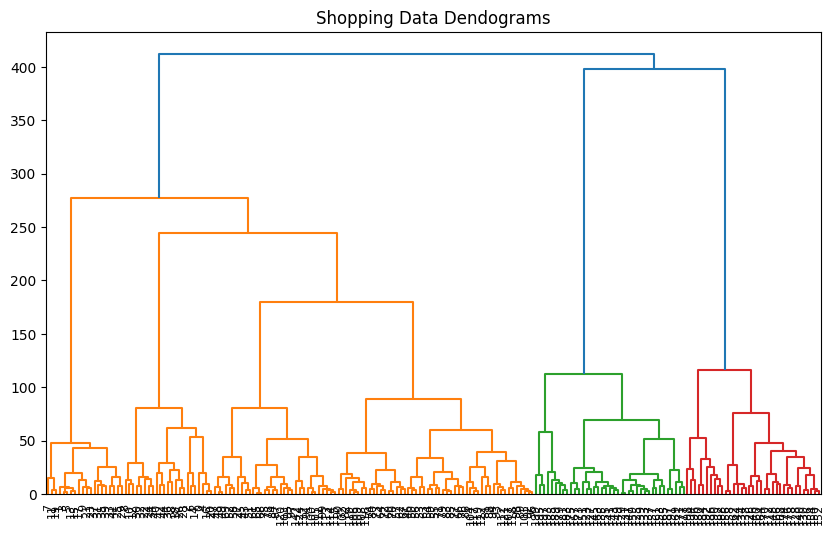

In [71]:
shopping_dataset = pd.read_csv('shopping-data.csv')

shopping_dataset = shopping_dataset.drop(['CustomerID', 'Genre'], axis=1)

Z = linkage(shopping_dataset, method='ward')

# Vẽ chương trình dendrogram
plt.figure(figsize=(10, 6))
plt.title("Shopping Data Dendograms")
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

[389.3861889564372, 295.45624492135573, 205.22514747675928, 168.2475801755684, 133.8888702113103, 117.16911517019713, 103.9442363296738, 93.61455312876808, 81.84894954697741]


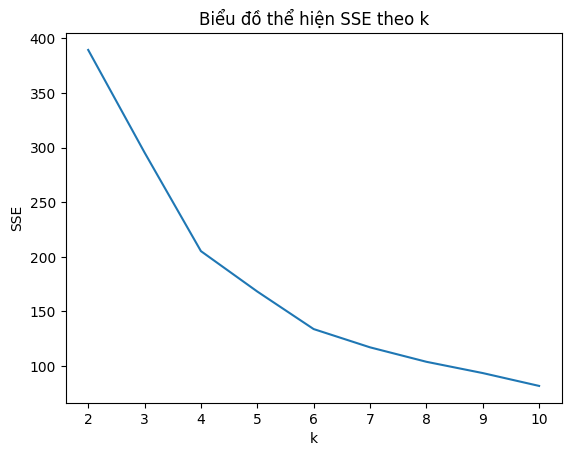

Giá trị tốt nhất cho k: 8


In [69]:
kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++', random_state=42)
kmeans.fit(shopping_dataset)
clusters = kmeans.predict(shopping_dataset)
centroids = kmeans.cluster_centers_
shopping_dataset = StandardScaler().fit_transform(shopping_dataset)

#SSE
sse = []
for k in range(2, 11): 
 kmeans = KMeans(n_clusters=k, n_init=10, init='k-means++', random_state = 0) 
 kmeans.fit(shopping_dataset) 
 sse.append(kmeans.inertia_)

print(sse)

plt.plot(range(2, 11), sse)
plt.title('Biểu đồ thể hiện SSE theo k')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

# Giá trị tốt nhất của k

# tính điểm cực tiểu của đạo hàm bậc 2
# để tìm giá trị mà k mà ở đó sse giảm chậm hơn
deltas = np.diff(sse, 2) 

k_best = np.argmin(deltas) + 2 #trừ đi 2 vì bắt đầu từ 2 đến 10
print("Giá trị tốt nhất cho k:", k_best)

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [77]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(shopping_dataset)
print(cluster.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#Finally,
Save a copy in your Github. Remember renaming the notebook.